In [47]:
import h5py
import keras
import sklearn.svm
import matplotlib.pyplot as plt
import numpy
import seaborn
%matplotlib inline

In [161]:
with h5py.File('../data/dataset.h5', 'r') as f:
    magnitudes = f['features'][:, :4]
    w1 = magnitudes[:, 0]
    w2 = magnitudes[:, 1]
    w3 = magnitudes[:, 2]
    w4 = magnitudes[:, 3]
    
    labels = f['labels'][:]
    
    ratio_y = w1 - w2
    ratio_x = w2 - w3
    ratio_t = w3 - w4
    
    features = numpy.vstack([w1, w2, w3, w4, ratio_x, ratio_y, ratio_t]).T
    print(features.shape)
    print(features.min(), features.max())

(24140, 7)
-1.176 19.269


In [162]:
# Downsample.
positives = (labels == 1).nonzero()[0]
negatives = (labels == 0).nonzero()[0]
numpy.random.shuffle(negatives)
negatives = negatives[:positives.shape[0]]

downsampled = numpy.hstack([positives, negatives])
numpy.random.shuffle(downsampled)
print(downsampled.shape)

(4514,)


In [163]:
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(30, input_shape=(2,), activation='tanh'))
# model.add(keras.layers.Dense(20, input_shape=(2,), activation='tanh'))
# model.add(keras.layers.Dense(10, input_shape=(2,), activation='tanh'))
# model.add(keras.layers.Dense(1, input_shape=(2,)))
# model.add(keras.layers.Activation('sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adagrad')
# model.fit(features[downsampled], labels[downsampled], nb_epoch=40)

svc = sklearn.svm.SVC(class_weight='balanced', C=0.10)
svc.fit(features[downsampled], labels[downsampled])

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [169]:
import pandas
features_df = pandas.DataFrame(features[downsampled])
features_df['labels'] = labels[downsampled].astype(bool)

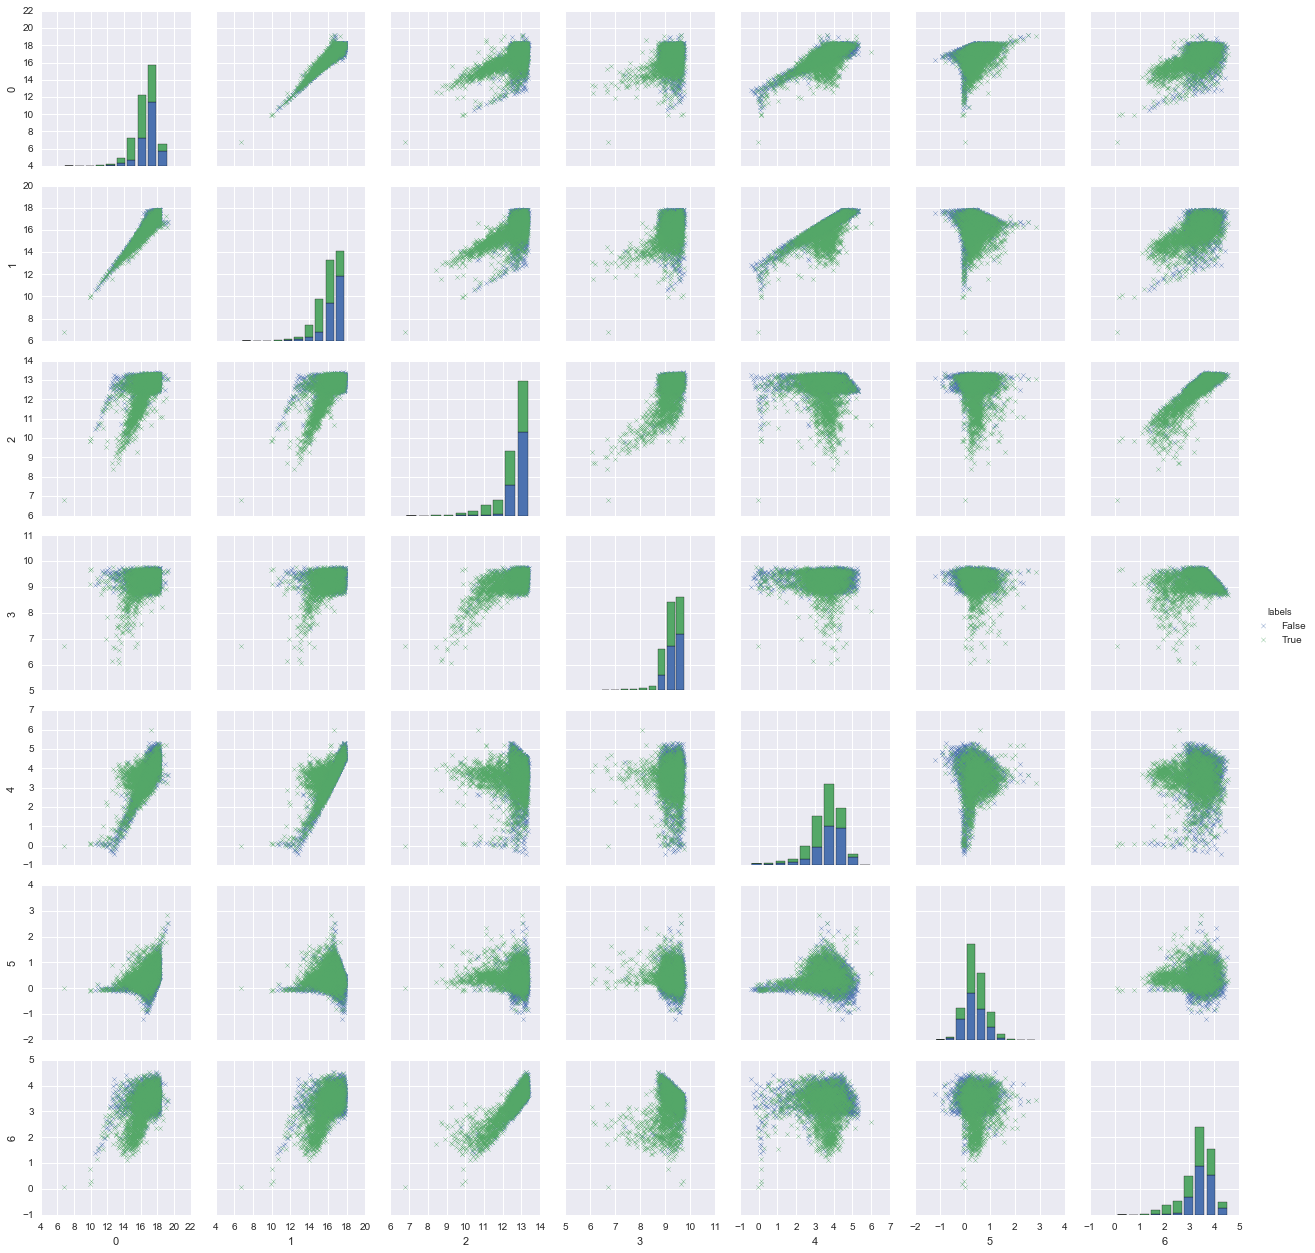

In [171]:
seaborn.pairplot(features_df, hue='labels', vars=range(7), kind='scatter', markers='x')
plt.show()

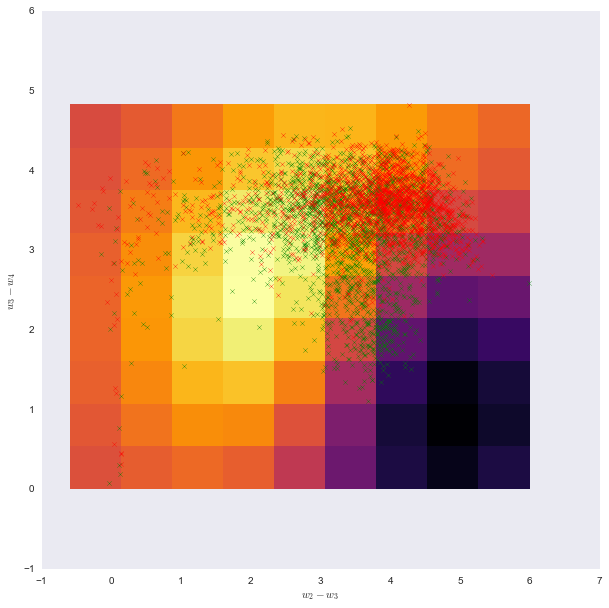

In [136]:
# x = numpy.linspace(features[:, 0].min(), features[:, 0].max(), 10)
# y = numpy.linspace(features[:, 1].min(), features[:, 1].max(), 10)
# t = numpy.linspace(features[:, 2].min(), features[:, 2].max(), 10)

# xx, yy, tt = numpy.meshgrid(x, y, t)
# zz = numpy.vstack([xx.ravel(), yy.ravel(), tt.ravel()]).T

# # decision_function = keras.backend.function([model.layers[0].input],
# #                                            [model.layers[-2].output])
# # decisions = decision_function([zz])[0].sum(axis=-1).reshape((100, 100))
# decisions = svc.decision_function(zz).reshape((10, 10, 10)).sum(axis=1)
# plt.figure(figsize=(10, 10))
# plt.pcolormesh(x, t, decisions, cmap='inferno')
# plt.xlabel('$w_2 - w_3$')
# plt.ylabel('$w_3 - w_4$')
# plt.show()

In [117]:
(numpy.round(model.predict(features[downsampled])) == 1).mean()

0.075468911534485303